Individual Explained Variance Ratio (for each PC):
[0.72770452 0.23030523 0.03683832 0.00515193]

Cumulative Explained Variance Ratio:
[0.72770452 0.95800975 0.99484807 1.        ]


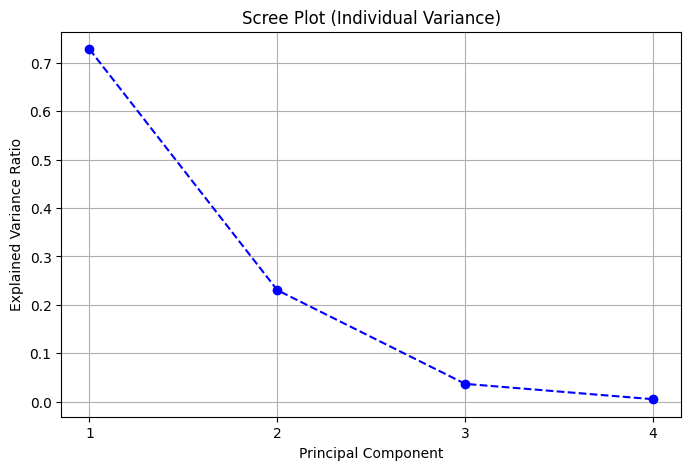

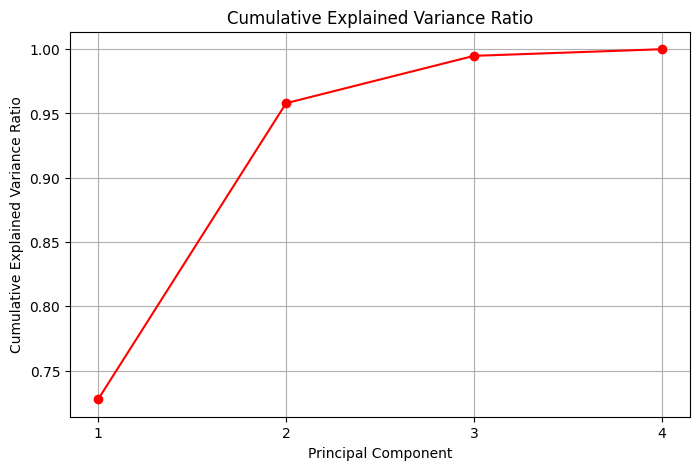

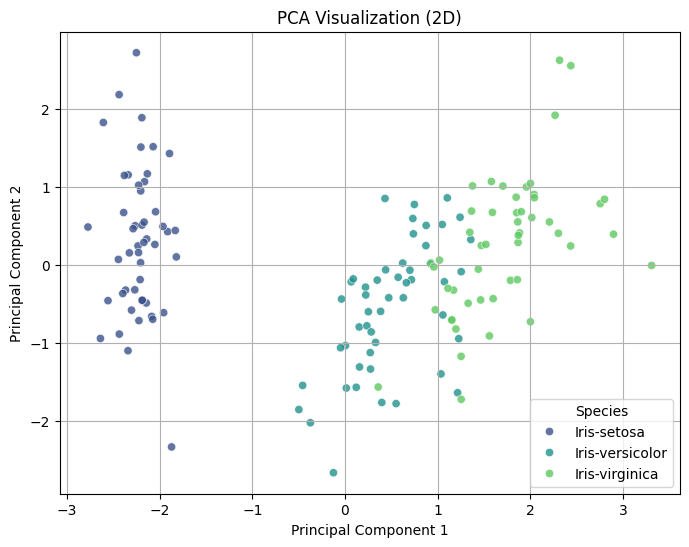

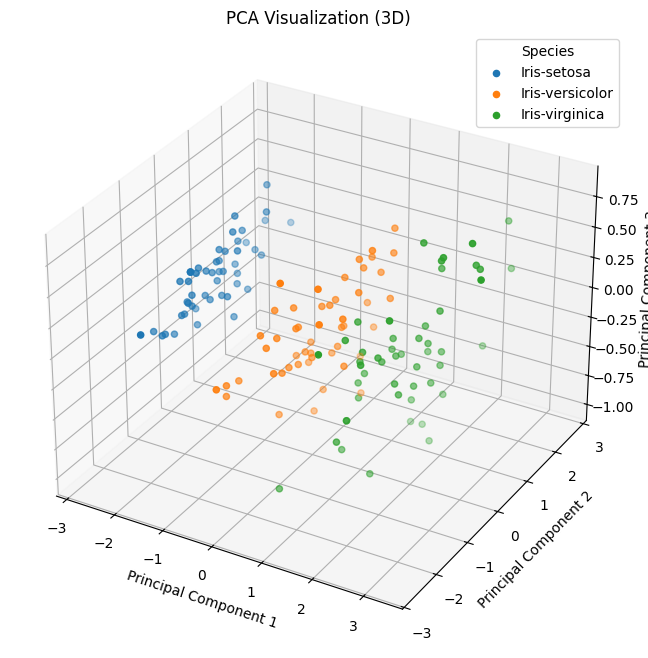

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = "Iris.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Drop unnecessary columns
features = df.drop(columns=["Id", "Species"])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca_transformed = pca.fit_transform(scaled_features)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print the individual and cumulative variance ratio
print("Individual Explained Variance Ratio (for each PC):")
print(explained_variance)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance)

# 1. Scree Plot (Individual Variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Individual Variance)')
plt.xticks(np.arange(1, len(explained_variance) + 1, 1))
plt.grid(True)
plt.show()

# 2. Cumulative Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, 1))
plt.grid(True)
plt.show()

# 3. Reduce to 2 components for 2D visualization
pca_2d = PCA(n_components=2)
pca_2d_transformed = pca_2d.fit_transform(scaled_features)

# Create a DataFrame with the reduced data
pca_df = pd.DataFrame(pca_2d_transformed, columns=["PC1", "PC2"])
pca_df["Species"] = df["Species"]

# 4. Scatter plot (2D PCA visualization)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Species", palette="viridis", alpha=0.8)
plt.title("PCA Visualization (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.grid(True)
plt.show()

# 5. Reduce to 3 components for 3D visualization
pca_3d = PCA(n_components=3)
pca_3d_transformed = pca_3d.fit_transform(scaled_features)

# Create a DataFrame with the 3D reduced data
pca_3d_df = pd.DataFrame(pca_3d_transformed, columns=["PC1", "PC2", "PC3"])
pca_3d_df["Species"] = df["Species"]

# 6. 3D Scatter plot (3D PCA visualization)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using ax.scatter for 3D
for species in pca_3d_df["Species"].unique():
    species_data = pca_3d_df[pca_3d_df["Species"] == species]
    ax.scatter(species_data["PC1"], species_data["PC2"], species_data["PC3"], label=species)

ax.set_title("PCA Visualization (3D)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(title="Species")
plt.show()


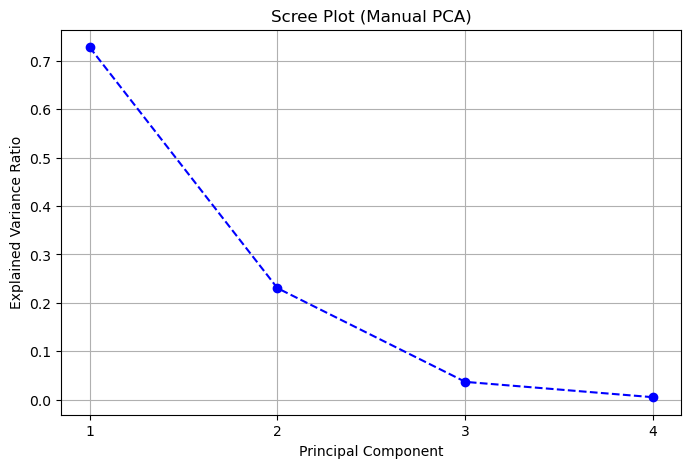

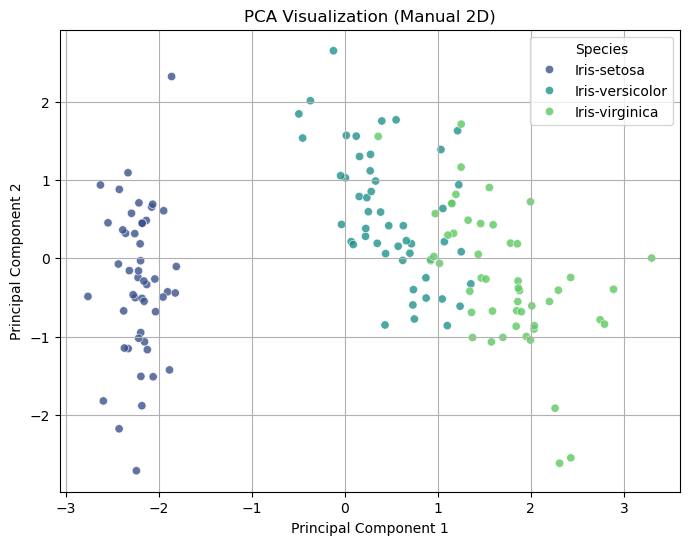

In [3]:
#WITHOUT SKLEARN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Iris.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop unnecessary columns
features = df.drop(columns=["Id", "Species"]).values  # Convert to NumPy array

# Step 1: Standardize the data (manual calculation)
mean_vec = np.mean(features, axis=0)
std_vec = np.std(features, axis=0, ddof=1)  # Sample standard deviation
standardized_data = (features - mean_vec) / std_vec

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(standardized_data.T)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Explained variance ratio
explained_variance_manual = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_manual) + 1), explained_variance_manual, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Manual PCA)')
plt.xticks(np.arange(1, len(explained_variance_manual) + 1, 1))
plt.grid()
plt.show()

# Step 5: Project data onto the first two principal components
pca_manual_2d = np.dot(standardized_data, sorted_eigenvectors[:, :2])

# Convert to DataFrame for visualization
pca_manual_df = pd.DataFrame(pca_manual_2d, columns=["PC1", "PC2"])
pca_manual_df["Species"] = df["Species"]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_manual_df, x="PC1", y="PC2", hue="Species", palette="viridis", alpha=0.8)
plt.title("PCA Visualization (Manual 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.grid()
plt.show()
